In [1]:
import mediapipe

ModuleNotFoundError: No module named 'mediapipe'

In [1]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)

# To check TensorFlow-GPU version
print("TensorFlow-GPU version:", tf.version.VERSION)

TensorFlow version: 2.4.1
TensorFlow-GPU version: 2.4.1


In [67]:
pip install --upgrade tensorflow==2.4.1

  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.2
    Uninstalling numpy-1.20.2:
      Successfully uninstalled numpy-1.20.2
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\users\\vishw\\.conda\\envs\\tf\\lib\\site-packages\\~umpy\\.libs\\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



In [1]:
pip install --upgrade tensorflow-gpu==2.4.1

  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached tensorboard-2.11.2-py3-none-any.whl (6.0 MB)
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached tensorflow_estimator-2.4.0-py2.py3-none-any.whl (462 kB)
  Using cached grpcio-1.32.0-cp37-cp37m-win_amd64.whl (2.5 MB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.37.0
    Uninstalling grpcio-1.37.0:
      Successfully uninstalled grpcio-1.37.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Attempting un

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 1.15.0 requires gast==0.2.2, but you have gast 0.3.3 which is incompatible.
tensorflow 1.15.0 requires tensorboard<1.16.0,>=1.15.0, but you have tensorboard 2.11.2 which is incompatible.
tensorflow 1.15.0 requires tensorflow-estimator==1.15.1, but you have tensorflow-estimator 2.4.0 which is incompatible.
mediapipe 0.9.0.1 requires flatbuffers>=2.0, but you have flatbuffers 1.12 which is incompatible.


In [2]:
!pip install mediapipe

  Using cached flatbuffers-23.3.3-py2.py3-none-any.whl (26 kB)
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-gpu 2.4.1 requires flatbuffers~=1.12.0, but you have flatbuffers 23.3.3 which is incompatible.


In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [3]:
mp_holistic=mp.solutions.holistic
mp_drawing=mp.solutions.drawing_utils

In [4]:
def mediapipe_detection(image,model):
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image.flags.writeable=False
    results=model.process(image)
    image.flags.writeable=True
    image=cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    return image, results

In [5]:
from mediapipe.python.solutions import face_mesh
def draw_landmarks(image,results):
    #mp_drawing.draw_landmarks(image,results.face_landmarks,face_mesh.FACE_CONNECTIONS)
    mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS)

In [6]:
cap = cv2.VideoCapture(0)
# Setting mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()

        image,results=mediapipe_detection(frame,holistic)
        print(results)

        draw_landmarks(image, results)

        cv2.imshow('OpenCV Feed', image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
len(results.left_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

In [8]:
draw_landmarks(frame,results)

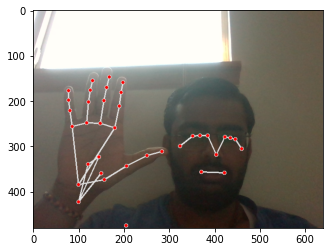

In [9]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [10]:
len(results.left_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

In [11]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose,lh,rh])

In [12]:
result=extract_keypoints(results)
result

array([ 6.31912112e-01,  6.63343191e-01, -1.28236651e+00,  9.97775614e-01,
        6.62002385e-01,  5.82509279e-01, -1.17219019e+00,  9.97113883e-01,
        6.79982603e-01,  5.86672425e-01, -1.17256618e+00,  9.97578859e-01,
        6.96984410e-01,  5.92403948e-01, -1.17236590e+00,  9.96756136e-01,
        6.02646768e-01,  5.76514125e-01, -1.15680671e+00,  9.97464955e-01,
        5.76269090e-01,  5.76419413e-01, -1.15578687e+00,  9.98084068e-01,
        5.50915778e-01,  5.78623116e-01, -1.15623283e+00,  9.97975349e-01,
        7.19017863e-01,  6.35661364e-01, -5.85474372e-01,  9.97629046e-01,
        5.07498860e-01,  6.24231637e-01, -5.22180200e-01,  9.98567224e-01,
        6.60524607e-01,  7.46219456e-01, -1.07406700e+00,  9.97725248e-01,
        5.80166876e-01,  7.42919266e-01, -1.05297852e+00,  9.98537362e-01,
        8.77346873e-01,  1.02797675e+00, -3.30207199e-01,  9.63584483e-01,
        3.21205914e-01,  9.87684667e-01, -3.11549634e-01,  9.82828915e-01,
        9.95705962e-01,  

In [13]:
np.save('1',result)

In [14]:
notebook_path = os.path.abspath("")

In [15]:
DATA_PATH=os.path.join(notebook_path,'575_project_input_data')
alphabets=np.array(['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','0','1','2','3','4','5','6','7','8','9'])
no_of_videos_alphabet=30
no_of_frames_video_alphabet=30

In [16]:
for alphabet in alphabets: 
    #dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, alphabet))).astype(int))
    for video_no in range(1,no_of_videos_alphabet+1):
        try: 
            os.makedirs(os.path.join(DATA_PATH, alphabet, str(video_no)))
        except:
            pass


In [166]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    

    for alphabet in alphabets:
        for video_no in range(1,no_of_videos_alphabet+1):
            for frame_num in range(1,no_of_frames_video_alphabet+1):

                # Read feed
                ret, frame = cap.read()

                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_landmarks(image, results)

                if frame_num == 1: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(alphabet, video_no), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(alphabet, video_no), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)

                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH,alphabet,str(video_no),str(frame_num))
                np.save(npy_path, keypoints)

                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [195]:
#So now completed collecting data
#Now categorize and segregate the data

In [17]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [18]:
labels_for_alphabets = {label:num for num, label in enumerate(alphabets)}

In [19]:
labels_for_alphabets

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25,
 '0': 26,
 '1': 27,
 '2': 28,
 '3': 29,
 '4': 30,
 '5': 31,
 '6': 32,
 '7': 33,
 '8': 34,
 '9': 35}

In [48]:
alphabets_data, labels = [], []
for alphabet in alphabets:
    for video_values in np.array(os.listdir(os.path.join(DATA_PATH, alphabet))).astype(int):
        window = []
        for frame_num in range(1,no_of_frames_video_alphabet+1):
            res = np.load(os.path.join(DATA_PATH, alphabet, str(video_values), "{}.npy".format(frame_num)))
            window.append(res)
        alphabets_data.append(window)
        labels.append(labels_for_alphabets[alphabet])

In [49]:
X=np.array(alphabets_data)
X.shape

(1080, 30, 258)

In [50]:
np.array(labels).shape

(1080,)

In [51]:
y=to_categorical(labels).astype(int)
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [53]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(864, 30, 258)
(216, 30, 258)
(864, 36)
(216, 36)


In [54]:
# Categorizing ipoyindhi, next neural network ni train

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [96]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,258)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(alphabets.shape[0], activation='softmax'))

In [97]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [98]:
model.fit(X_train, y_train, epochs=500)

Epoch 1/500
27/27 [==============================] - 4s 48ms/step - loss: 3.6081 - categorical_accuracy: 0.0277
Epoch 2/500
27/27 [==============================] - 1s 48ms/step - loss: 3.5165 - categorical_accuracy: 0.0608
Epoch 3/500
27/27 [==============================] - 1s 43ms/step - loss: 3.5821 - categorical_accuracy: 0.0365
Epoch 4/500
27/27 [==============================] - 1s 38ms/step - loss: 3.5596 - categorical_accuracy: 0.0295
Epoch 5/500
27/27 [==============================] - 1s 40ms/step - loss: 3.4940 - categorical_accuracy: 0.0501
Epoch 6/500
27/27 [==============================] - 1s 42ms/step - loss: 3.3868 - categorical_accuracy: 0.0819
Epoch 7/500
27/27 [==============================] - 1s 41ms/step - loss: 3.4334 - categorical_accuracy: 0.0622
Epoch 8/500
27/27 [==============================] - 1s 42ms/step - loss: 3.2752 - categorical_accuracy: 0.1047
Epoch 9/500
27/27 [==============================] - 1s 42ms/step - loss: 3.2064 - categorical_accuracy:

27/27 [==============================] - 1s 44ms/step - loss: 0.8070 - categorical_accuracy: 0.6927
Epoch 73/500
27/27 [==============================] - 1s 43ms/step - loss: 0.6754 - categorical_accuracy: 0.7466 0s - loss: 0.6717 - categorical_accuracy: 0.74
Epoch 74/500
27/27 [==============================] - 1s 43ms/step - loss: 0.9151 - categorical_accuracy: 0.6806
Epoch 75/500
27/27 [==============================] - 1s 44ms/step - loss: 0.6338 - categorical_accuracy: 0.7758 1s - loss: 0.6501 
Epoch 76/500
27/27 [==============================] - 1s 44ms/step - loss: 0.5845 - categorical_accuracy: 0.7905
Epoch 77/500
27/27 [==============================] - 1s 44ms/step - loss: 0.9608 - categorical_accuracy: 0.6764
Epoch 78/500
27/27 [==============================] - 1s 45ms/step - loss: 0.5791 - categorical_accuracy: 0.8150
Epoch 79/500
27/27 [==============================] - 1s 44ms/step - loss: 0.7028 - categorical_accuracy: 0.7485
Epoch 80/500
27/27 [=======================

27/27 [==============================] - 1s 44ms/step - loss: 0.3600 - categorical_accuracy: 0.8704
Epoch 144/500
27/27 [==============================] - 1s 43ms/step - loss: 0.3744 - categorical_accuracy: 0.8691
Epoch 145/500
27/27 [==============================] - 1s 46ms/step - loss: 0.2119 - categorical_accuracy: 0.9277
Epoch 146/500
27/27 [==============================] - 1s 49ms/step - loss: 0.2507 - categorical_accuracy: 0.9192
Epoch 147/500
27/27 [==============================] - 1s 44ms/step - loss: 0.1431 - categorical_accuracy: 0.9460
Epoch 148/500
27/27 [==============================] - 1s 45ms/step - loss: 0.1335 - categorical_accuracy: 0.9592
Epoch 149/500
27/27 [==============================] - 1s 46ms/step - loss: 0.2594 - categorical_accuracy: 0.9157
Epoch 150/500
27/27 [==============================] - 1s 46ms/step - loss: 0.4207 - categorical_accuracy: 0.8621
Epoch 151/500
27/27 [==============================] - 1s 45ms/step - loss: 0.6117 - categorical_accur

27/27 [==============================] - 1s 43ms/step - loss: 0.4572 - categorical_accuracy: 0.8538
Epoch 215/500
27/27 [==============================] - 1s 43ms/step - loss: 1.1465 - categorical_accuracy: 0.6240
Epoch 216/500
27/27 [==============================] - 1s 44ms/step - loss: 0.6804 - categorical_accuracy: 0.7939
Epoch 217/500
27/27 [==============================] - 1s 45ms/step - loss: 0.5408 - categorical_accuracy: 0.8406
Epoch 218/500
27/27 [==============================] - 1s 45ms/step - loss: 0.7212 - categorical_accuracy: 0.7364
Epoch 219/500
27/27 [==============================] - 1s 47ms/step - loss: 0.7557 - categorical_accuracy: 0.7282
Epoch 220/500
27/27 [==============================] - 1s 45ms/step - loss: 0.6237 - categorical_accuracy: 0.7677
Epoch 221/500
27/27 [==============================] - 1s 48ms/step - loss: 0.5915 - categorical_accuracy: 0.7858
Epoch 222/500
27/27 [==============================] - 1s 53ms/step - loss: 0.5256 - categorical_accur

27/27 [==============================] - 1s 45ms/step - loss: 0.5580 - categorical_accuracy: 0.8110
Epoch 286/500
27/27 [==============================] - 1s 49ms/step - loss: 0.2978 - categorical_accuracy: 0.8937
Epoch 287/500
27/27 [==============================] - 1s 45ms/step - loss: 0.2008 - categorical_accuracy: 0.9271
Epoch 288/500
27/27 [==============================] - 1s 45ms/step - loss: 0.2282 - categorical_accuracy: 0.9200
Epoch 289/500
27/27 [==============================] - 1s 45ms/step - loss: 0.3589 - categorical_accuracy: 0.8714 0s - loss: 0.3589 - categorical_accuracy: 0.87
Epoch 290/500
27/27 [==============================] - 1s 44ms/step - loss: 0.4094 - categorical_accuracy: 0.8497
Epoch 291/500
27/27 [==============================] - 1s 45ms/step - loss: 0.4513 - categorical_accuracy: 0.8431
Epoch 292/500
27/27 [==============================] - 1s 46ms/step - loss: 0.2810 - categorical_accuracy: 0.9142
Epoch 293/500
27/27 [==============================] - 

27/27 [==============================] - 1s 44ms/step - loss: 0.1923 - categorical_accuracy: 0.9183
Epoch 357/500
27/27 [==============================] - 1s 45ms/step - loss: 0.1466 - categorical_accuracy: 0.9471
Epoch 358/500
27/27 [==============================] - 1s 45ms/step - loss: 0.1602 - categorical_accuracy: 0.9479
Epoch 359/500
27/27 [==============================] - 1s 46ms/step - loss: 0.1365 - categorical_accuracy: 0.9606
Epoch 360/500
27/27 [==============================] - 1s 46ms/step - loss: 0.1557 - categorical_accuracy: 0.9289
Epoch 361/500
27/27 [==============================] - 1s 47ms/step - loss: 0.1350 - categorical_accuracy: 0.9544
Epoch 362/500
27/27 [==============================] - 1s 47ms/step - loss: 0.1363 - categorical_accuracy: 0.9525
Epoch 363/500
27/27 [==============================] - 1s 49ms/step - loss: 0.1637 - categorical_accuracy: 0.9351
Epoch 364/500
27/27 [==============================] - 1s 44ms/step - loss: 0.1105 - categorical_accur

27/27 [==============================] - 1s 49ms/step - loss: 0.2429 - categorical_accuracy: 0.9218
Epoch 428/500
27/27 [==============================] - 1s 44ms/step - loss: 0.2191 - categorical_accuracy: 0.9263
Epoch 429/500
27/27 [==============================] - 1s 43ms/step - loss: 0.1375 - categorical_accuracy: 0.9530
Epoch 430/500
27/27 [==============================] - 1s 44ms/step - loss: 0.1502 - categorical_accuracy: 0.9498
Epoch 431/500
27/27 [==============================] - 1s 44ms/step - loss: 0.1052 - categorical_accuracy: 0.9630
Epoch 432/500
27/27 [==============================] - 1s 44ms/step - loss: 0.0552 - categorical_accuracy: 0.9853
Epoch 433/500
27/27 [==============================] - 1s 44ms/step - loss: 0.0632 - categorical_accuracy: 0.9798
Epoch 434/500
27/27 [==============================] - 1s 46ms/step - loss: 0.0599 - categorical_accuracy: 0.9796
Epoch 435/500
27/27 [==============================] - 1s 45ms/step - loss: 0.1162 - categorical_accur

27/27 [==============================] - 1s 45ms/step - loss: 0.0697 - categorical_accuracy: 0.9797
Epoch 499/500
27/27 [==============================] - 1s 44ms/step - loss: 0.1012 - categorical_accuracy: 0.9684
Epoch 500/500
27/27 [==============================] - 1s 45ms/step - loss: 0.1112 - categorical_accuracy: 0.9669


In [99]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 30, 64)            82688     
_________________________________________________________________
lstm_10 (LSTM)               (None, 30, 128)           98816     
_________________________________________________________________
lstm_11 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dense_9 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 36)                1188      
Total params: 238,340
Trainable params: 238,340
Non-trainable params: 0
________________________________________________

In [100]:
#now do prediction

In [101]:
res=model.predict(X_test)
print(res)

[[1.1819667e-09 4.1063444e-04 5.2474560e-03 ... 5.9486427e-03
  1.8631429e-03 6.9648860e-04]
 [7.4950041e-10 3.7271722e-04 1.8354236e-06 ... 1.7592944e-14
  9.7513133e-16 1.1046793e-12]
 [1.4301775e-09 9.5783674e-09 1.9316183e-04 ... 7.8759069e-11
  1.2515704e-06 2.1724720e-03]
 ...
 [4.6402217e-08 2.6371081e-09 5.9785741e-08 ... 2.2574158e-09
  1.3943095e-03 1.1639152e-08]
 [1.0261827e-17 2.6416501e-07 7.6487314e-09 ... 6.9818563e-17
  4.3406279e-09 6.5502972e-09]
 [4.1991494e-10 5.0469428e-14 1.7397033e-08 ... 8.8873506e-03
  2.6492991e-03 7.6738799e-01]]


In [102]:
np.argmax(res)

2176

In [103]:
for i in range(len(res)):
    print(i,alphabets[np.argmax(res[i])])

0 W
1 F
2 D
3 I
4 P
5 S
6 C
7 9
8 M
9 1
10 C
11 I
12 V
13 G
14 7
15 B
16 0
17 9
18 5
19 E
20 O
21 V
22 L
23 1
24 X
25 H
26 A
27 1
28 P
29 N
30 I
31 Z
32 S
33 Z
34 E
35 A
36 Z
37 V
38 V
39 8
40 U
41 L
42 M
43 3
44 B
45 3
46 B
47 N
48 F
49 8
50 U
51 L
52 2
53 O
54 M
55 P
56 Y
57 2
58 6
59 C
60 Q
61 9
62 T
63 Z
64 8
65 5
66 1
67 J
68 R
69 I
70 6
71 P
72 G
73 G
74 A
75 I
76 Q
77 W
78 M
79 F
80 C
81 P
82 P
83 I
84 K
85 0
86 D
87 L
88 Y
89 6
90 I
91 Y
92 1
93 S
94 I
95 F
96 J
97 2
98 9
99 G
100 S
101 D
102 Y
103 0
104 W
105 H
106 8
107 8
108 9
109 W
110 4
111 O
112 C
113 A
114 S
115 S
116 L
117 3
118 A
119 V
120 1
121 X
122 Q
123 K
124 U
125 I
126 8
127 H
128 Z
129 G
130 C
131 F
132 V
133 H
134 Z
135 L
136 Z
137 T
138 C
139 Q
140 A
141 Z
142 R
143 6
144 E
145 D
146 8
147 W
148 T
149 2
150 3
151 X
152 M
153 V
154 I
155 P
156 J
157 Y
158 6
159 7
160 K
161 9
162 O
163 J
164 Z
165 T
166 1
167 6
168 N
169 V
170 A
171 X
172 7
173 Y
174 M
175 S
176 5
177 9
178 X
179 S
180 B
181 0
182 1
183 R
184 O


In [104]:
for i in range(len(res)):
    print(i,alphabets[np.argmax(y_test[i])])

0 0
1 F
2 D
3 I
4 P
5 S
6 D
7 R
8 L
9 1
10 C
11 I
12 V
13 G
14 7
15 B
16 E
17 9
18 5
19 4
20 O
21 V
22 L
23 1
24 X
25 H
26 A
27 1
28 P
29 N
30 I
31 Z
32 S
33 Z
34 E
35 A
36 Z
37 V
38 2
39 8
40 U
41 L
42 Q
43 3
44 B
45 R
46 B
47 N
48 F
49 8
50 U
51 E
52 2
53 O
54 J
55 P
56 Y
57 2
58 6
59 C
60 Q
61 9
62 T
63 Z
64 8
65 5
66 1
67 Z
68 R
69 0
70 6
71 P
72 G
73 G
74 A
75 J
76 T
77 W
78 N
79 F
80 W
81 P
82 Q
83 I
84 K
85 0
86 D
87 L
88 Y
89 6
90 I
91 Y
92 B
93 S
94 I
95 F
96 J
97 8
98 9
99 G
100 Q
101 D
102 Y
103 0
104 W
105 H
106 R
107 8
108 3
109 W
110 4
111 C
112 C
113 A
114 S
115 S
116 L
117 3
118 A
119 V
120 1
121 W
122 O
123 K
124 6
125 I
126 8
127 H
128 Z
129 G
130 C
131 F
132 V
133 H
134 Z
135 L
136 G
137 T
138 C
139 Q
140 A
141 Z
142 R
143 6
144 E
145 D
146 8
147 W
148 T
149 2
150 3
151 X
152 M
153 V
154 I
155 P
156 J
157 Y
158 6
159 7
160 K
161 9
162 O
163 J
164 9
165 S
166 1
167 6
168 N
169 V
170 A
171 W
172 7
173 I
174 Q
175 E
176 5
177 9
178 W
179 S
180 B
181 0
182 1
183 R
184 O


In [105]:
model.save('sign_language_interpreter.h5')

In [106]:
X_test.shape

(216, 30, 258)

In [107]:
sequence = []
sentence = []
predictions = []
threshold = 0.3
i=0

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.insert(0,keypoints)
        sequence = sequence[:30]
        print(len(sequence))
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            x=alphabets[np.argmax(res)]
            if(len(sentence)>1):
                if(sentence[len(sentence)-1]!=x):
                    sentence.append(x)
                    i+=1
            else:
                sentence.append(x)
                i+=1
                
            print(x)
            del sequence[0:30]
            #predictions.append(np.argmax(res))
            
            
        #3. Viz logic
        #if np.unique(predictions[-10:])[0]==np.argmax(res): 
        """"if res[np.argmax(res)] > threshold: 

            if len(sentence) > 0: 
                if alphabets[np.argmax(res)] != sentence[-1]:
                    sentence.append(alphabets[np.argmax(res)])
            else:
                sentence.append(alphabets[np.argmax(res)])

        if len(sentence) > 5: 
            sentence = sentence[-5:]"""


        if(len(sentence)>0):    
            cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
            cv2.putText(image, ''.join(sentence[i-1]), (3,30), 
                           cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4
<class 'mediapipe.python.solution_base.SolutionOutputs'>
5
<class 'mediapipe.python.solution_base.SolutionOutputs'>
6
<class 'mediapipe.python.solution_base.SolutionOutputs'>
7
<class 'mediapipe.python.solution_base.SolutionOutputs'>
8
<class 'mediapipe.python.solution_base.SolutionOutputs'>
9
<class 'mediapipe.python.solution_base.SolutionOutputs'>
10
<class 'mediapipe.python.solution_base.SolutionOutputs'>
11
<class 'mediapipe.python.solution_base.SolutionOutputs'>
12
<class 'mediapipe.python.solution_base.SolutionOutputs'>
13
<class 'mediapipe.python.solution_base.SolutionOutputs'>
14
<class 'mediapipe.python.solution_base.SolutionOutputs'>
15
<class 'mediapipe.python.solution_base.SolutionOutputs'>
16
<class 'mediapipe.python.solution_base.SolutionOu

<class 'mediapipe.python.solution_base.SolutionOutputs'>
20
<class 'mediapipe.python.solution_base.SolutionOutputs'>
21
<class 'mediapipe.python.solution_base.SolutionOutputs'>
22
<class 'mediapipe.python.solution_base.SolutionOutputs'>
23
<class 'mediapipe.python.solution_base.SolutionOutputs'>
24
<class 'mediapipe.python.solution_base.SolutionOutputs'>
25
<class 'mediapipe.python.solution_base.SolutionOutputs'>
26
<class 'mediapipe.python.solution_base.SolutionOutputs'>
27
<class 'mediapipe.python.solution_base.SolutionOutputs'>
28
<class 'mediapipe.python.solution_base.SolutionOutputs'>
29
<class 'mediapipe.python.solution_base.SolutionOutputs'>
30
P
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4
<class 'mediapipe.python.solution_base.SolutionOutputs'>
5
<class 'mediapipe.python.solution_base.Solu

<class 'mediapipe.python.solution_base.SolutionOutputs'>
10
<class 'mediapipe.python.solution_base.SolutionOutputs'>
11
<class 'mediapipe.python.solution_base.SolutionOutputs'>
12
<class 'mediapipe.python.solution_base.SolutionOutputs'>
13
<class 'mediapipe.python.solution_base.SolutionOutputs'>
14
<class 'mediapipe.python.solution_base.SolutionOutputs'>
15
<class 'mediapipe.python.solution_base.SolutionOutputs'>
16
<class 'mediapipe.python.solution_base.SolutionOutputs'>
17
<class 'mediapipe.python.solution_base.SolutionOutputs'>
18
<class 'mediapipe.python.solution_base.SolutionOutputs'>
19
<class 'mediapipe.python.solution_base.SolutionOutputs'>
20
<class 'mediapipe.python.solution_base.SolutionOutputs'>
21
<class 'mediapipe.python.solution_base.SolutionOutputs'>
22
<class 'mediapipe.python.solution_base.SolutionOutputs'>
23
<class 'mediapipe.python.solution_base.SolutionOutputs'>
24
<class 'mediapipe.python.solution_base.SolutionOutputs'>
25
<class 'mediapipe.python.solution_base.S

<class 'mediapipe.python.solution_base.SolutionOutputs'>
28
<class 'mediapipe.python.solution_base.SolutionOutputs'>
29
<class 'mediapipe.python.solution_base.SolutionOutputs'>
30
M
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4
<class 'mediapipe.python.solution_base.SolutionOutputs'>
5
<class 'mediapipe.python.solution_base.SolutionOutputs'>
6
<class 'mediapipe.python.solution_base.SolutionOutputs'>
7
<class 'mediapipe.python.solution_base.SolutionOutputs'>
8
<class 'mediapipe.python.solution_base.SolutionOutputs'>
9
<class 'mediapipe.python.solution_base.SolutionOutputs'>
10
<class 'mediapipe.python.solution_base.SolutionOutputs'>
11
<class 'mediapipe.python.solution_base.SolutionOutputs'>
12
<class 'mediapipe.python.solution_base.SolutionOutputs'>
13
<class 'mediapipe.python.solution_base.Solution

<class 'mediapipe.python.solution_base.SolutionOutputs'>
16
<class 'mediapipe.python.solution_base.SolutionOutputs'>
17
<class 'mediapipe.python.solution_base.SolutionOutputs'>
18
<class 'mediapipe.python.solution_base.SolutionOutputs'>
19
<class 'mediapipe.python.solution_base.SolutionOutputs'>
20
<class 'mediapipe.python.solution_base.SolutionOutputs'>
21
<class 'mediapipe.python.solution_base.SolutionOutputs'>
22
<class 'mediapipe.python.solution_base.SolutionOutputs'>
23
<class 'mediapipe.python.solution_base.SolutionOutputs'>
24
<class 'mediapipe.python.solution_base.SolutionOutputs'>
25
<class 'mediapipe.python.solution_base.SolutionOutputs'>
26
<class 'mediapipe.python.solution_base.SolutionOutputs'>
27
<class 'mediapipe.python.solution_base.SolutionOutputs'>
28
<class 'mediapipe.python.solution_base.SolutionOutputs'>
29
<class 'mediapipe.python.solution_base.SolutionOutputs'>
30
N
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.

<class 'mediapipe.python.solution_base.SolutionOutputs'>
4
<class 'mediapipe.python.solution_base.SolutionOutputs'>
5
<class 'mediapipe.python.solution_base.SolutionOutputs'>
6
<class 'mediapipe.python.solution_base.SolutionOutputs'>
7
<class 'mediapipe.python.solution_base.SolutionOutputs'>
8
<class 'mediapipe.python.solution_base.SolutionOutputs'>
9
<class 'mediapipe.python.solution_base.SolutionOutputs'>
10
<class 'mediapipe.python.solution_base.SolutionOutputs'>
11
<class 'mediapipe.python.solution_base.SolutionOutputs'>
12
<class 'mediapipe.python.solution_base.SolutionOutputs'>
13
<class 'mediapipe.python.solution_base.SolutionOutputs'>
14
<class 'mediapipe.python.solution_base.SolutionOutputs'>
15
<class 'mediapipe.python.solution_base.SolutionOutputs'>
16
<class 'mediapipe.python.solution_base.SolutionOutputs'>
17
<class 'mediapipe.python.solution_base.SolutionOutputs'>
18
<class 'mediapipe.python.solution_base.SolutionOutputs'>
19
<class 'mediapipe.python.solution_base.Solutio

<class 'mediapipe.python.solution_base.SolutionOutputs'>
24
<class 'mediapipe.python.solution_base.SolutionOutputs'>
25
<class 'mediapipe.python.solution_base.SolutionOutputs'>
26
<class 'mediapipe.python.solution_base.SolutionOutputs'>
27
<class 'mediapipe.python.solution_base.SolutionOutputs'>
28
<class 'mediapipe.python.solution_base.SolutionOutputs'>
29
<class 'mediapipe.python.solution_base.SolutionOutputs'>
30
N
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4
<class 'mediapipe.python.solution_base.SolutionOutputs'>
5
<class 'mediapipe.python.solution_base.SolutionOutputs'>
6
<class 'mediapipe.python.solution_base.SolutionOutputs'>
7
<class 'mediapipe.python.solution_base.SolutionOutputs'>
8
<class 'mediapipe.python.solution_base.SolutionOutputs'>
9
<class 'mediapipe.python.solution_base.Solution

11
<class 'mediapipe.python.solution_base.SolutionOutputs'>
12
<class 'mediapipe.python.solution_base.SolutionOutputs'>
13
<class 'mediapipe.python.solution_base.SolutionOutputs'>
14
<class 'mediapipe.python.solution_base.SolutionOutputs'>
15
<class 'mediapipe.python.solution_base.SolutionOutputs'>
16
<class 'mediapipe.python.solution_base.SolutionOutputs'>
17
<class 'mediapipe.python.solution_base.SolutionOutputs'>
18
<class 'mediapipe.python.solution_base.SolutionOutputs'>
19
<class 'mediapipe.python.solution_base.SolutionOutputs'>
20
<class 'mediapipe.python.solution_base.SolutionOutputs'>
21
<class 'mediapipe.python.solution_base.SolutionOutputs'>
22
<class 'mediapipe.python.solution_base.SolutionOutputs'>
23
<class 'mediapipe.python.solution_base.SolutionOutputs'>
24
<class 'mediapipe.python.solution_base.SolutionOutputs'>
25
<class 'mediapipe.python.solution_base.SolutionOutputs'>
26
<class 'mediapipe.python.solution_base.SolutionOutputs'>
27
<class 'mediapipe.python.solution_bas

<class 'mediapipe.python.solution_base.SolutionOutputs'>
30
M
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4
<class 'mediapipe.python.solution_base.SolutionOutputs'>
5
<class 'mediapipe.python.solution_base.SolutionOutputs'>
6
<class 'mediapipe.python.solution_base.SolutionOutputs'>
7
<class 'mediapipe.python.solution_base.SolutionOutputs'>
8
<class 'mediapipe.python.solution_base.SolutionOutputs'>
9
<class 'mediapipe.python.solution_base.SolutionOutputs'>
10
<class 'mediapipe.python.solution_base.SolutionOutputs'>
11
<class 'mediapipe.python.solution_base.SolutionOutputs'>
12
<class 'mediapipe.python.solution_base.SolutionOutputs'>
13
<class 'mediapipe.python.solution_base.SolutionOutputs'>
14
<class 'mediapipe.python.solution_base.SolutionOutputs'>
15
<class 'mediapipe.python.solution_base.Solution

<class 'mediapipe.python.solution_base.SolutionOutputs'>
20
<class 'mediapipe.python.solution_base.SolutionOutputs'>
21
<class 'mediapipe.python.solution_base.SolutionOutputs'>
22
<class 'mediapipe.python.solution_base.SolutionOutputs'>
23
<class 'mediapipe.python.solution_base.SolutionOutputs'>
24
<class 'mediapipe.python.solution_base.SolutionOutputs'>
25
<class 'mediapipe.python.solution_base.SolutionOutputs'>
26
<class 'mediapipe.python.solution_base.SolutionOutputs'>
27
<class 'mediapipe.python.solution_base.SolutionOutputs'>
28
<class 'mediapipe.python.solution_base.SolutionOutputs'>
29
<class 'mediapipe.python.solution_base.SolutionOutputs'>
30
L
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4
<class 'mediapipe.python.solution_base.SolutionOutputs'>
5
<class 'mediapipe.python.solution_base.Solu

<class 'mediapipe.python.solution_base.SolutionOutputs'>
9
<class 'mediapipe.python.solution_base.SolutionOutputs'>
10
<class 'mediapipe.python.solution_base.SolutionOutputs'>
11
<class 'mediapipe.python.solution_base.SolutionOutputs'>
12
<class 'mediapipe.python.solution_base.SolutionOutputs'>
13
<class 'mediapipe.python.solution_base.SolutionOutputs'>
14
<class 'mediapipe.python.solution_base.SolutionOutputs'>
15
<class 'mediapipe.python.solution_base.SolutionOutputs'>
16
<class 'mediapipe.python.solution_base.SolutionOutputs'>
17
<class 'mediapipe.python.solution_base.SolutionOutputs'>
18
<class 'mediapipe.python.solution_base.SolutionOutputs'>
19
<class 'mediapipe.python.solution_base.SolutionOutputs'>
20
<class 'mediapipe.python.solution_base.SolutionOutputs'>
21
<class 'mediapipe.python.solution_base.SolutionOutputs'>
22
<class 'mediapipe.python.solution_base.SolutionOutputs'>
23
<class 'mediapipe.python.solution_base.SolutionOutputs'>
24
<class 'mediapipe.python.solution_base.So

<class 'mediapipe.python.solution_base.SolutionOutputs'>
27
<class 'mediapipe.python.solution_base.SolutionOutputs'>
28
<class 'mediapipe.python.solution_base.SolutionOutputs'>
29
<class 'mediapipe.python.solution_base.SolutionOutputs'>
30
U
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4
<class 'mediapipe.python.solution_base.SolutionOutputs'>
5
<class 'mediapipe.python.solution_base.SolutionOutputs'>
6
<class 'mediapipe.python.solution_base.SolutionOutputs'>
7
<class 'mediapipe.python.solution_base.SolutionOutputs'>
8
<class 'mediapipe.python.solution_base.SolutionOutputs'>
9
<class 'mediapipe.python.solution_base.SolutionOutputs'>
10
<class 'mediapipe.python.solution_base.SolutionOutputs'>
11
<class 'mediapipe.python.solution_base.SolutionOutputs'>
12
<class 'mediapipe.python.solution_base.Solution

14
<class 'mediapipe.python.solution_base.SolutionOutputs'>
15
<class 'mediapipe.python.solution_base.SolutionOutputs'>
16
<class 'mediapipe.python.solution_base.SolutionOutputs'>
17
<class 'mediapipe.python.solution_base.SolutionOutputs'>
18
<class 'mediapipe.python.solution_base.SolutionOutputs'>
19
<class 'mediapipe.python.solution_base.SolutionOutputs'>
20
<class 'mediapipe.python.solution_base.SolutionOutputs'>
21
<class 'mediapipe.python.solution_base.SolutionOutputs'>
22
<class 'mediapipe.python.solution_base.SolutionOutputs'>
23
<class 'mediapipe.python.solution_base.SolutionOutputs'>
24
<class 'mediapipe.python.solution_base.SolutionOutputs'>
25
<class 'mediapipe.python.solution_base.SolutionOutputs'>
26
<class 'mediapipe.python.solution_base.SolutionOutputs'>
27
<class 'mediapipe.python.solution_base.SolutionOutputs'>
28
<class 'mediapipe.python.solution_base.SolutionOutputs'>
29
<class 'mediapipe.python.solution_base.SolutionOutputs'>
30
3
<class 'mediapipe.python.solution_b

<class 'mediapipe.python.solution_base.SolutionOutputs'>
4
<class 'mediapipe.python.solution_base.SolutionOutputs'>
5
<class 'mediapipe.python.solution_base.SolutionOutputs'>
6
<class 'mediapipe.python.solution_base.SolutionOutputs'>
7
<class 'mediapipe.python.solution_base.SolutionOutputs'>
8
<class 'mediapipe.python.solution_base.SolutionOutputs'>
9
<class 'mediapipe.python.solution_base.SolutionOutputs'>
10
<class 'mediapipe.python.solution_base.SolutionOutputs'>
11
<class 'mediapipe.python.solution_base.SolutionOutputs'>
12
<class 'mediapipe.python.solution_base.SolutionOutputs'>
13
<class 'mediapipe.python.solution_base.SolutionOutputs'>
14
<class 'mediapipe.python.solution_base.SolutionOutputs'>
15
<class 'mediapipe.python.solution_base.SolutionOutputs'>
16
<class 'mediapipe.python.solution_base.SolutionOutputs'>
17
<class 'mediapipe.python.solution_base.SolutionOutputs'>
18
<class 'mediapipe.python.solution_base.SolutionOutputs'>
19
<class 'mediapipe.python.solution_base.Solutio

In [77]:
cap.release()
cv2.destroyAllWindows()

In [92]:
keypoints = extract_keypoints(results)
sequence.append(keypoints)
print(len(sequence))
x=np.array(sequence).shape
x

3


(3, 258)

In [ ]:
np.expand_dims()